In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Train data

In [144]:
data_train = pd.read_csv('/content/drive/MyDrive/ICT/Intermediate_Dec8/train_LZdllcl.csv')

In [145]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [146]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [147]:
data_train.shape

(54808, 14)

In [148]:
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [149]:
data_train.duplicated().sum()

0

In [150]:
data_train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [151]:
data_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [152]:
data_train['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


In [153]:
data_train['education'] = data_train['education'].fillna('Prefer not to say')

In [154]:
data_train['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Prefer not to say,2409
Below Secondary,805


In [155]:
data_train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [156]:
data_train['previous_year_rating'].value_counts()

,count
previous_year_rating,
3.0,18618
5.0,11741
4.0,9877
1.0,6223
2.0,4225


In [157]:
data_train['previous_year_rating'] = data_train['previous_year_rating'].fillna(0)

In [158]:
data_train['previous_year_rating'].value_counts()

,count
previous_year_rating,
3.0,18618
5.0,11741
4.0,9877
1.0,6223
2.0,4225
0.0,4124


In [159]:
data_train.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [160]:
print(data_train['department'].unique())
print(data_train['region'].unique())
print(data_train['education'].unique())
print(data_train['gender'].unique())
print(data_train['recruitment_channel'].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
["Master's & above" "Bachelor's" 'Prefer not to say' 'Below Secondary']
['f' 'm']
['sourcing' 'other' 'referred']


In [161]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [163]:
data_train['department'] = le.fit_transform(data_train['department'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")

Category: Analytics -> Encoded as: 0
Category: Finance -> Encoded as: 1
Category: HR -> Encoded as: 2
Category: Legal -> Encoded as: 3
Category: Operations -> Encoded as: 4
Category: Procurement -> Encoded as: 5
Category: R&D -> Encoded as: 6
Category: Sales & Marketing -> Encoded as: 7
Category: Technology -> Encoded as: 8


In [164]:
data_train['region'] = le.fit_transform(data_train['region'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")

Category: region_1 -> Encoded as: 0
Category: region_10 -> Encoded as: 1
Category: region_11 -> Encoded as: 2
Category: region_12 -> Encoded as: 3
Category: region_13 -> Encoded as: 4
Category: region_14 -> Encoded as: 5
Category: region_15 -> Encoded as: 6
Category: region_16 -> Encoded as: 7
Category: region_17 -> Encoded as: 8
Category: region_18 -> Encoded as: 9
Category: region_19 -> Encoded as: 10
Category: region_2 -> Encoded as: 11
Category: region_20 -> Encoded as: 12
Category: region_21 -> Encoded as: 13
Category: region_22 -> Encoded as: 14
Category: region_23 -> Encoded as: 15
Category: region_24 -> Encoded as: 16
Category: region_25 -> Encoded as: 17
Category: region_26 -> Encoded as: 18
Category: region_27 -> Encoded as: 19
Category: region_28 -> Encoded as: 20
Category: region_29 -> Encoded as: 21
Category: region_3 -> Encoded as: 22
Category: region_30 -> Encoded as: 23
Category: region_31 -> Encoded as: 24
Category: region_32 -> Encoded as: 25
Category: region_33 -> En

In [165]:
data_train['education'] = le.fit_transform(data_train['education'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")

Category: Bachelor's -> Encoded as: 0
Category: Below Secondary -> Encoded as: 1
Category: Master's & above -> Encoded as: 2
Category: Prefer not to say -> Encoded as: 3


In [166]:
data_train['gender'] = le.fit_transform(data_train['gender'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")

Category: f -> Encoded as: 0
Category: m -> Encoded as: 1


In [167]:
data_train['recruitment_channel'] = le.fit_transform(data_train['recruitment_channel'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")

Category: other -> Encoded as: 0
Category: referred -> Encoded as: 1
Category: sourcing -> Encoded as: 2


In [168]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [169]:
x = data_train.drop('employee_id',axis=1)
x = x.drop('is_promoted',axis=1)
y = data_train['is_promoted']

In [170]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [172]:
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[9970,   84],
       [ 824,   84]])

In [174]:
print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

accuracy_score =  0.9171683999270206
Precision =  0.5
Recall_score =  0.09251101321585903
f1 score =  0.15613382899628253


In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
metrik_k = []
for k in range(3,15):
  classifier = KNeighborsClassifier(k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)
metrik_k

[0.9204524721766101,
 0.9275679620507207,
 0.9258347016967706,
 0.9269293924466339,
 0.9272942893632549,
 0.9272942893632549,
 0.9275679620507207,
 0.9272030651340997,
 0.9271118409049444,
 0.9267469439883232,
 0.927020616675789,
 0.9263820470717022]

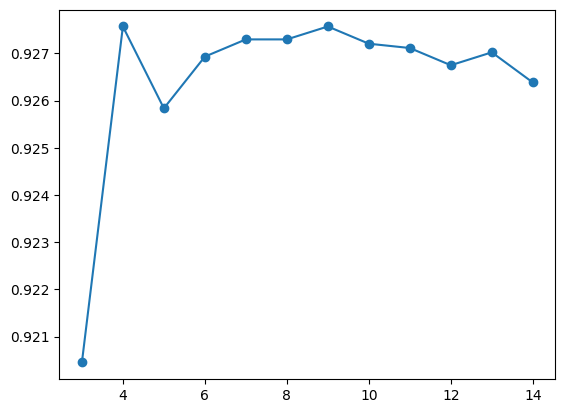

In [177]:
plt.plot(range(3,15),metrik_k,'o-')

In [178]:
classifier = KNeighborsClassifier(4) # k=4 gives the maximum accuracy
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[10026,    28],
       [  766,   142]])

In [179]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.9275679620507207
Precision =  0.8352941176470589
Recall_score =  0.15638766519823788
f1 score =  0.2634508348794063


In [180]:
from sklearn.svm import SVC
sv = SVC()

In [181]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[10054,     0],
       [  908,     0]])

In [182]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.9171683999270206
Precision =  0.0
Recall_score =  0.0
f1 score =  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [183]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[9916,  138],
       [ 795,  113]])

In [184]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.914887794198139
Precision =  0.450199203187251
Recall_score =  0.12444933920704845
f1 score =  0.19499568593615185


In [185]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[9462,  592],
       [ 520,  388]])

In [186]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.8985586571793468
Precision =  0.39591836734693875
Recall_score =  0.42731277533039647
f1 score =  0.4110169491525424


In [187]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[9446,  608],
       [ 489,  419]])

In [188]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.8999270206166758
Precision =  0.4079844206426485
Recall_score =  0.46145374449339205
f1 score =  0.4330749354005168


# Test data

In [189]:
data_test = pd.read_csv('/content/drive/MyDrive/ICT/Intermediate_Dec8/test_2umaH9m.csv')

In [190]:
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [191]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [192]:
data_test.shape

(23490, 13)

In [193]:
data_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [194]:
data_test.duplicated().sum()

0

In [195]:
data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [196]:
data_test['education'].unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

In [197]:
data_test['education'] = data_test['education'].fillna('Prefer not to say')

In [198]:
data_test['education'].value_counts()

,count
education,
Bachelor's,15578
Master's & above,6504
Prefer not to say,1034
Below Secondary,374


In [199]:
data_test['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [200]:
data_test['previous_year_rating'] = data_test['previous_year_rating'].fillna(0)
data_test['previous_year_rating'].value_counts()

,count
previous_year_rating,
3.0,7921
5.0,5097
4.0,4249
1.0,2680
0.0,1812
2.0,1731


In [201]:
data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [202]:
print(data_test['department'].unique())
print(data_test['region'].unique())
print(data_test['education'].unique())
print(data_test['gender'].unique())
print(data_test['recruitment_channel'].unique())

['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']
["Bachelor's" "Master's & above" 'Prefer not to say' 'Below Secondary']
['m' 'f']
['sourcing' 'other' 'referred']


In [203]:
data_test['department'] = le.fit_transform(data_test['department'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")
data_test['region'] = le.fit_transform(data_test['region'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")
data_test['education'] = le.fit_transform(data_test['education'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")
data_test['gender'] = le.fit_transform(data_test['gender'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")
data_test['recruitment_channel'] = le.fit_transform(data_test['recruitment_channel'])
for idx, label in enumerate(le.classes_):
    print(f"Category: {label} -> Encoded as: {idx}")

Category: Analytics -> Encoded as: 0
Category: Finance -> Encoded as: 1
Category: HR -> Encoded as: 2
Category: Legal -> Encoded as: 3
Category: Operations -> Encoded as: 4
Category: Procurement -> Encoded as: 5
Category: R&D -> Encoded as: 6
Category: Sales & Marketing -> Encoded as: 7
Category: Technology -> Encoded as: 8
Category: region_1 -> Encoded as: 0
Category: region_10 -> Encoded as: 1
Category: region_11 -> Encoded as: 2
Category: region_12 -> Encoded as: 3
Category: region_13 -> Encoded as: 4
Category: region_14 -> Encoded as: 5
Category: region_15 -> Encoded as: 6
Category: region_16 -> Encoded as: 7
Category: region_17 -> Encoded as: 8
Category: region_18 -> Encoded as: 9
Category: region_19 -> Encoded as: 10
Category: region_2 -> Encoded as: 11
Category: region_20 -> Encoded as: 12
Category: region_21 -> Encoded as: 13
Category: region_22 -> Encoded as: 14
Category: region_23 -> Encoded as: 15
Category: region_24 -> Encoded as: 16
Category: region_25 -> Encoded as: 17
Ca

In [204]:
print(data_test['department'].unique())
print(data_test['region'].unique())
print(data_test['education'].unique())
print(data_test['gender'].unique())
print(data_test['recruitment_channel'].unique())

[8 2 7 5 1 0 4 3 6]
[18 28  4 11 21 31 14  7  8 16  2 19 33 12 27 15 32  5 24 10 29 20  6 22
 17  3 13 23  1 26 25 30  0  9]
[0 2 3 1]
[1 0]
[2 0 1]


In [205]:
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,0.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [206]:
x_data_test = data_test.drop('employee_id',axis=1)

In [207]:
y_pred_data_test = clf.predict(x_data_test)

In [208]:
sample_submission = pd.read_csv('/content/drive/MyDrive/ICT/Intermediate_Dec8/sample_submission_M0L0uXE.csv')

In [209]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [210]:
sample_submission.shape

(23490, 2)

In [211]:
sample_submission['is_promoted'] = y_pred_data_test

In [212]:
sample_submission.to_csv('submission.csv', index=False)

In [214]:
import os
print(os.getcwd())

/content
